In [19]:
import json
import glob
import requests
import os
import pandas as pd
import numpy as np 
import itertools 
import logging 
import utils
import importlib
importlib.reload(utils)
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
from utils import read_filing_text

In [2]:
# construct a list of CIK from available filings
FILING_TYPE = "8-K"
FILING_DATA_PATH = "/Users/codywan/Data/SEC Edgar Scraping/"+FILING_TYPE
CIK_list = [int(filing_path.split("/")[-1].split("_")[1]) for filing_path in glob.glob(FILING_DATA_PATH + "/*.json")]
print(f"number of CIK: {len(CIK_list)}")

number of CIK: 728


In [3]:
""" descriptive statistics on filing files """
filing_num_list = list()
for CIK in CIK_list:
    with open(FILING_DATA_PATH+"/8-K_"+str(CIK)+"_20200101.json") as f:
        master_filing_dict = json.load(f)
        filing_num_list.append(len(master_filing_dict))
pd.Series(filing_num_list).describe().round(2)

count     728.00
mean      125.05
std       117.21
min         0.00
25%        47.00
50%        86.00
75%       173.50
max      1020.00
dtype: float64

In [4]:
""" group CIK by industry """
# read ccmlinktable
ccmlinktable = pd.read_csv("/Users/codywan/Data/WRDS Data/crspa_ccmlinktable.csv").replace("", np.NaN)
# CIK to SIC
CIK_SIC_mapping = ccmlinktable.dropna(subset=['cik', 'sic'])[['cik', 'sic']].astype('int').set_index('cik')['sic'].to_dict()
SIC_list = [str(CIK_SIC_mapping[CIK]) for CIK in CIK_list]
print(f"number of corresponding SIC: {len(SIC_list)}")
# CIK to NAICS
CIK_NAICS_mapping = ccmlinktable.dropna(subset=['cik', 'naics'])[['cik', 'naics']].astype('int').set_index('cik')['naics'].to_dict()
NAICS_list = [str(CIK_NAICS_mapping[CIK]) for CIK in CIK_list]
print(f"number of corresponding NAICS: {len(NAICS_list)}")

number of corresponding SIC: 728
number of corresponding NAICS: 728


In [5]:
""" using NAICS """ 
with open("data/NACIS_sectors.json", "r") as f:
    NAICS_sectors = json.load(f)
NAICS_count = {key: 0 for key in NAICS_sectors}
NAICS_sector_code  = {key: key.split(",") for key in NAICS_sectors}

In [6]:
# count how many CIK(company) there is for each sector based on their NAICS number
for NAICS in NAICS_list:
    sector_code = NAICS[:2]
    for NAICS in NAICS_count:
        if sector_code in NAICS_sector_code[NAICS]:
            NAICS_count[NAICS] += 1

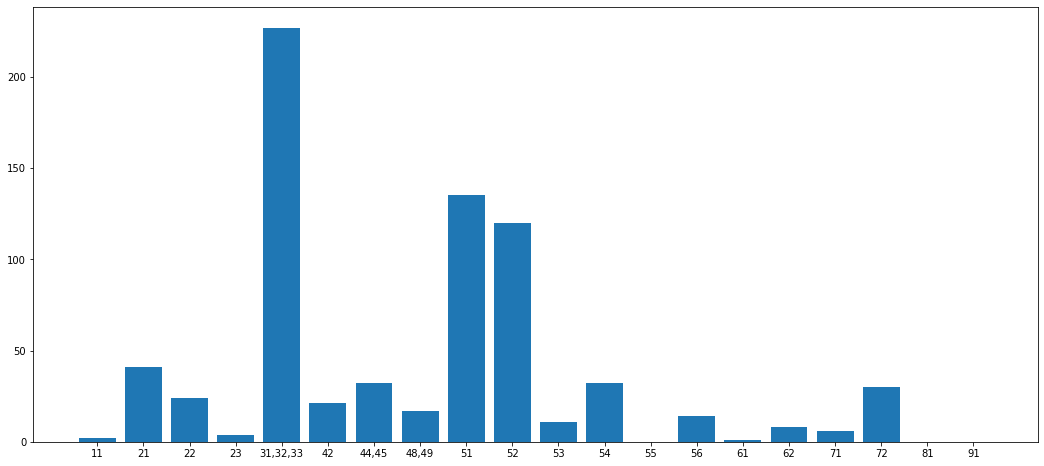

{'11': 'Agriculture, Forestry, Fishing and Hunting',
 '21': 'Mining, Quarrying, and Oil and Gas Extraction',
 '22': 'Utilities',
 '23': 'Construction',
 '31,32,33': 'Manufacturing',
 '42': 'Wholesale Trade',
 '44,45': 'Retail Trade',
 '48,49': 'Transportation and Warehousing',
 '51': 'Information',
 '52': 'Finance and Insurance',
 '53': 'Real Estate and Rental and Leasing',
 '54': 'Professional, Scientific, and Technical Services',
 '55': 'Management of Companies and Enterprises',
 '56': 'Administrative and Support and Waste Management and Remediation Services',
 '61': 'Educational Services',
 '62': 'Health Care and Social Assistance',
 '71': 'Arts, Entertainment, and Recreation',
 '72': 'Accommodation and Food Services',
 '81': 'Other Services',
 '91': 'Public Administration'}

In [7]:
""" industry distribution """
plt.figure(figsize=(18,8))
plt.bar(range(len(NAICS_count)),NAICS_count.values(),tick_label=list(NAICS_count.keys()))
plt.show()
display(NAICS_sectors)

In [8]:
# set up automatically running operations on every sector
FILING_TYPE = "8-K"
FILING_DATA_PATH = f"/Users/codywan/Data/SEC Edgar Scraping/{FILING_TYPE}/"
DATEB = "20200101"
# master_NACIS_code
master_NACIS_code = [val.split(",") for val in list(NAICS_count.keys())]
master_SECTOR = np.array(list(NAICS_sectors.values()))

In [9]:
pd.DataFrame(list(zip(master_NACIS_code, master_SECTOR)), columns=['code', 'name'])


,code,name
0,[11],"Agriculture, Forestry, Fishing and Hunting"
1,[21],"Mining, Quarrying, and Oil and Gas Extraction"
2,[22],Utilities
3,[23],Construction
4,"[31, 32, 33]",Manufacturing
5,[42],Wholesale Trade
6,"[44, 45]",Retail Trade
7,"[48, 49]",Transportation and Warehousing
8,[51],Information
9,[52],Finance and Insurance
